In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io, filters
import cv2
from concurrent.futures import ThreadPoolExecutor
from skimage import filters
from scipy import ndimage
import napari

import sys
import os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from IMD import core

In [8]:
cfp = io.imread('data/CFP.TIF')
fret = io.imread('data/FRET.TIF')

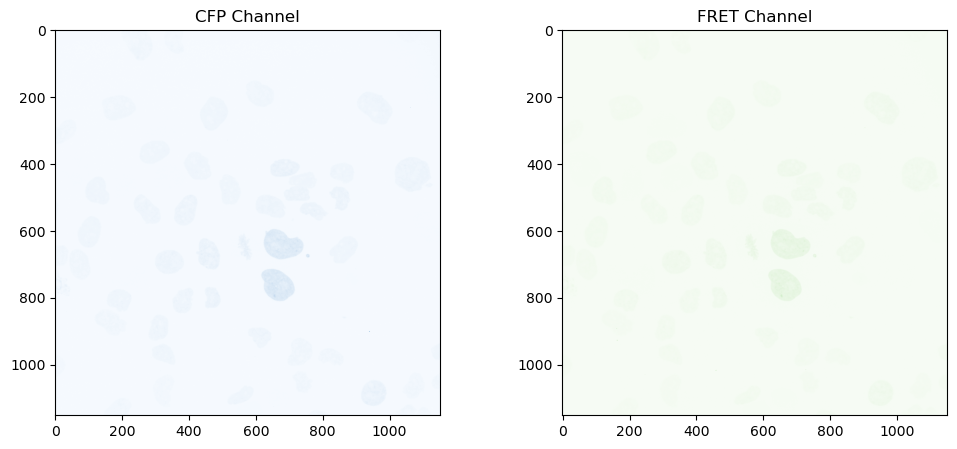

画像サイズ: CFP=(1152, 1152), FRET=(1152, 1152)
フレーム数: CFP=76, FRET=76


In [9]:
# 画像の確認
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(cfp[0], cmap='Blues')
ax1.set_title('CFP Channel')
ax2.imshow(fret[0], cmap='Greens')
ax2.set_title('FRET Channel')
plt.show()

print(f"画像サイズ: CFP={cfp[0].shape}, FRET={fret[0].shape}")
print(f"フレーム数: CFP={len(cfp)}, FRET={len(fret)}")

# フレーム数が一致しているか確認
if len(cfp) != len(fret):
    print("警告: CFPとFRETのフレーム数が一致していません")

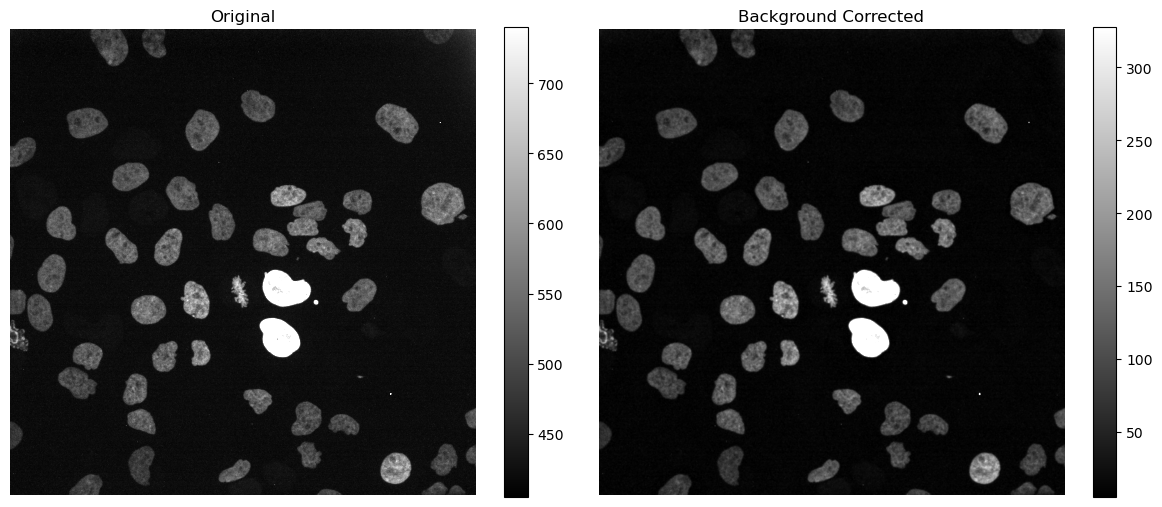

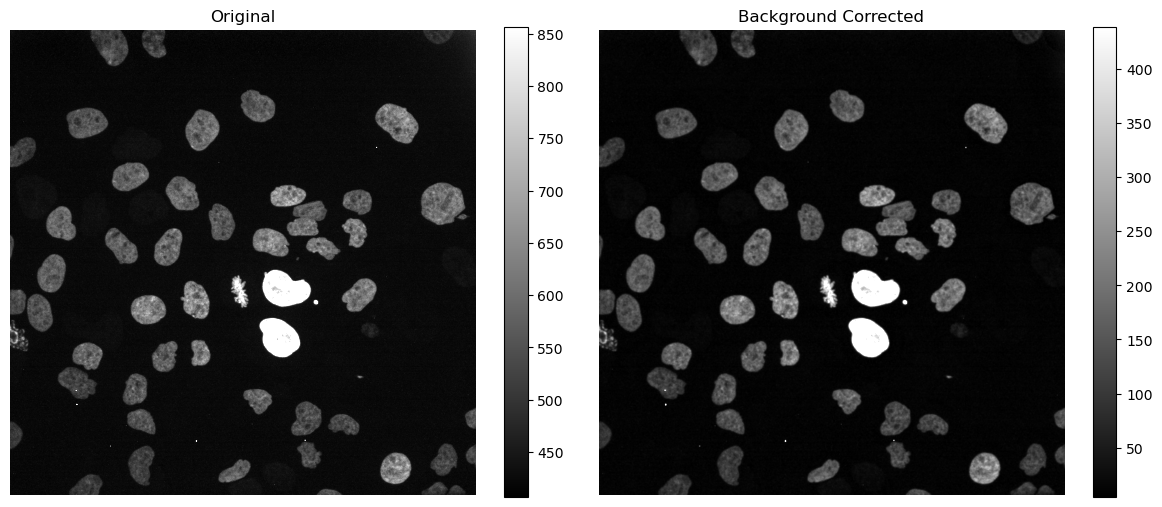

In [10]:
# CFPとFRETの背景補正を実行
cfp_corrected = core.rolling_ball_background_correction_fast_with_options(cfp, radius=50, scale_factor=0.5, use_gpu=False)
cfp_corrected += 1

fret_corrected = core.rolling_ball_background_correction_fast_with_options(fret,radius=50,scale_factor=0.5,use_gpu=False)

# 補正結果の確認
core.compare_background_correction(cfp, cfp_corrected, frame_idx=0)
core.compare_background_correction(fret, fret_corrected, frame_idx=0)

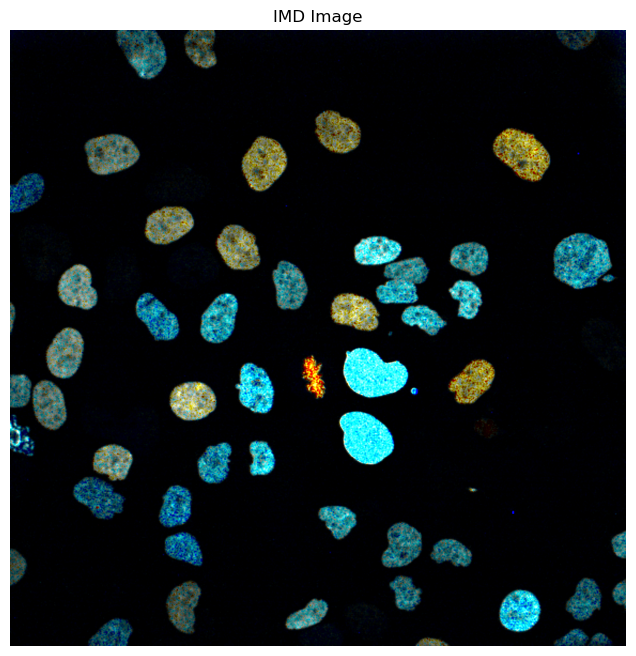

In [15]:
# IMD画像の生成
imd = core.create_imd(cfp_corrected, fret_corrected, rmax=2, rmin=1, dmax=200, dmin=10)

# 結果の表示（最初のフレーム）
plt.figure(figsize=(8, 8))
plt.imshow(imd[0])
plt.title('IMD Image')
plt.axis('off')
plt.show()

In [16]:
# ビューアーの起動
viewer = core.view_imd_with_napari(imd, cfp_corrected, fret_corrected)